In [ ]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('../Data/populations.txt',sep='\t')

In [3]:
# Veamos las poblaciones por año de cada especie
data

,# year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600
5,1905,20600.0,41700.0,39800
6,1906,18100.0,19000.0,38600
7,1907,21400.0,13000.0,42300
8,1908,22000.0,8300.0,44500
9,1909,25400.0,9100.0,42100


In [4]:
# Pasamos todas las columnas a Numpy Arrays
year = data["# year"].values
type(year)

numpy.ndarray

In [5]:
hares = data["hare"].values

In [6]:
lynxes = data["lynx"].values 

In [7]:
carrots = data["carrot"].values 

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

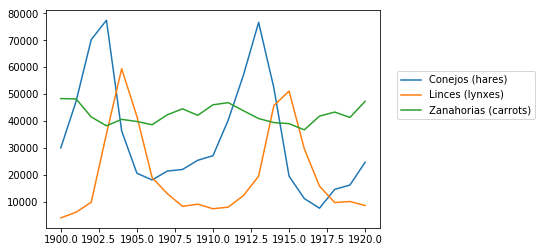

In [9]:
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Conejos (hares)', 'Linces (lynxes)', 'Zanahorias (carrots)'), loc=(1.05, 0.5)) 
plt.show()

## Estadística descriptiva

Para cada variable de la serie histórica, calculamos la media y el desvío. Redondeamos los valores para que tengan sólo 2 decimales.

In [10]:
# Con el método iloc, podemos hacer slicing de un dataframe de pandas 
# con las mismas reglas de slicing que usamos en los arrays de Numpy.

# Vamos a descartar la columna de años y a obtener
# un array usando la propiedad "values"
poblaciones = data.iloc[:, 1:].values

# Veamos una muestra del resultado.
poblaciones[0:5,:]

array([[30000.,  4000., 48300.],
       [47200.,  6100., 48200.],
       [70200.,  9800., 41500.],
       [77400., 35200., 38200.],
       [36300., 59400., 40600.]])

In [11]:
# Las funciones mean y std reciben como parámetro axis = 0.
# En cada caso colapsan el eje de filas, quedándose con una única fila
# con la media y el desvío estándar de cada columna, respectivamente.

print ("        Conejos, Linces, Zanahorias")
print ("Mean:", np.around(poblaciones.mean(axis=0), decimals=2))
print ("Std:", np.around(poblaciones.std(axis=0), decimals=2))

        Conejos, Linces, Zanahorias
Mean: [34080.95 20166.67 42400.  ]
Std: [20897.91 16254.59  3322.51]


A continuación, calculamos para cada especie el año en el que tuvieron más población. Vamos a identificar los máximos que se ven en el gráfico:

In [12]:
# El método "argmax" devuelve los índice de filas 
# donde se encuentran los valores máximos de cada columna
# (recordemos que axis=0 reduce la dimensión de las filas)
j_max_years = np.argmax(poblaciones, axis=0)

# Fancy Indexing
print ("                          Conejos, Linces, Zanahorias")
print ("Años de máxima población:", year[j_max_years])

                          Conejos, Linces, Zanahorias
Años de máxima población: [1903 1904 1900]


De forma similar podemos ver la especie con mayor población en cada año:

In [13]:
# Al recibir axis = 1 reduce el eje de las columnas. 
# Esto significa que calcula el máximo para cada fila.
max_species = np.argmax(poblaciones, axis=1)
species = np.array(['Conejos', 'Linces', 'Zanahorias'])

# Combino los dos vectores en un array de una dimensión más.
resultado = np.array([year, species[max_species]])
print ("Especies con máxima población:")
print (resultado)

Especies con máxima población:
[['1900' '1901' '1902' '1903' '1904' '1905' '1906' '1907' '1908' '1909'
  '1910' '1911' '1912' '1913' '1914' '1915' '1916' '1917' '1918' '1919'
  '1920']
 ['Zanahorias' 'Zanahorias' 'Conejos' 'Conejos' 'Linces' 'Linces'
  'Zanahorias' 'Zanahorias' 'Zanahorias' 'Zanahorias' 'Zanahorias'
  'Zanahorias' 'Conejos' 'Conejos' 'Conejos' 'Linces' 'Zanahorias'
  'Zanahorias' 'Zanahorias' 'Zanahorias' 'Zanahorias']]


In [14]:
resultado = [r for r in zip(year, species[max_species])]
resultado

[(1900, 'Zanahorias'),
 (1901, 'Zanahorias'),
 (1902, 'Conejos'),
 (1903, 'Conejos'),
 (1904, 'Linces'),
 (1905, 'Linces'),
 (1906, 'Zanahorias'),
 (1907, 'Zanahorias'),
 (1908, 'Zanahorias'),
 (1909, 'Zanahorias'),
 (1910, 'Zanahorias'),
 (1911, 'Zanahorias'),
 (1912, 'Conejos'),
 (1913, 'Conejos'),
 (1914, 'Conejos'),
 (1915, 'Linces'),
 (1916, 'Zanahorias'),
 (1917, 'Zanahorias'),
 (1918, 'Zanahorias'),
 (1919, 'Zanahorias'),
 (1920, 'Zanahorias')]

A continuación queremos ver en qué años alguna de las poblaciones se encuentra por encima de 50000

In [15]:
# La función de reducción de dimensiones np.any reduce el eje de las columnas indicando para cada fila si alguno de los 
# elementos de las columnas cumple con la condición de ser mayor a 50000
mayores_50000 = np.any(poblaciones > 50000, axis=1)
print ("Alguna población es mayor que 50000:", year[mayores_50000])

Alguna población es mayor que 50000: [1902 1903 1904 1912 1913 1914 1915]


También podemos consultar en qué dos años, cada especie tuvo sus niveles más bajos de población.

In [16]:
# primero selecciono los dos primeros índices ordenando por columna
j_top_2 = np.argsort(poblaciones, axis=0)[:2]
print ("Dos años de menor población por especie:")
print(['Conejos', 'Linces', 'Zanahorias'])
print (year[j_top_2])

Dos años de menor población por especie:
['Conejos', 'Linces', 'Zanahorias']
[[1917 1900 1916]
 [1916 1901 1903]]


También podemos analizar la matriz de covarianzas entre las distintas especies:

In [17]:
np.cov([hares, lynxes, carrots])

array([[ 4.58558619e+08,  2.56418333e+07, -1.21050000e+06],
       [ 2.56418333e+07,  2.77422333e+08, -3.85930000e+07],
       [-1.21050000e+06, -3.85930000e+07,  1.15910000e+07]])

* ¿Puedo comparar las distintas varianzas? ¿Por qué?
* ¿Qué variable tiene la mayor varianza? ¿Cómo se ve esto en el gráfico?
* ¿Qué significa una covarianza positiva? ¿Y una negativa?

In [18]:
np.corrcoef([hares, lynxes, carrots])

array([[ 1.        ,  0.07189206, -0.01660378],
       [ 0.07189206,  1.        , -0.68057717],
       [-0.01660378, -0.68057717,  1.        ]])

* ¿Cómo es el signo de la correlación con respecto al de la covarianza?
* ¿En qué unidades físicas está la correlación? ¿Y la covarianza?
* ¿Cuáles son las especies que están más correlacionadas? ¿Cómo se ve esto en el gráfico?